In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools
from collections.abc import Iterable

sns.set_style("darkgrid")

pd.set_option('max_columns', None)

In [2]:
def flatten_list(l):
    
    def flatten(l):
        for el in l:
            if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
                yield from flatten(el)
            else:
                yield el
                
    flat_l = flatten(l)
    
    return list(flat_l)

In [3]:
import traceback

def get_relevant_columns_by_config(config, dataframe):
    try:
        if config['i_net_nas'] == False:
            config.pop('i_net_nas_trials')
    except:
        pass
    
    for key, value in config.items():
        try:
            if isinstance(value, list):
                if isinstance(value[0], str):
                    dataframe_string_query = key + ' == "' + str(value[0]) + '"'
                    for dataframe_string in value[1:]:
                        dataframe_string_query += ' | ' + key + ' == "' + str(dataframe_string) + '"'

                    dataframe = dataframe.query(dataframe_string_query)
                else:
                    dataframe = dataframe[dataframe[key].isin(value)]
                    
            else:
                dataframe = dataframe[dataframe[key] == value]
        except:
            traceback.print_exc()
        
    return dataframe


In [4]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot, aspect=1.5, col_wrap=2):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=col_wrap,
                      aspect=aspect,
                      ##legend_out=False,
                     )    
    indexes = np.unique(data_reduced[hue], return_index=True)[1]
    hue_order = [data_reduced[hue].values[index] for index in sorted(indexes)]
        
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=hue_order,#np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          #order=data_reduced[order_columnname],
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [5]:
#results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
#results_complete_columns = list(results_complete.columns)

#results_summary = pd.read_csv('./results_summary-TEST.csv', delimiter=';')
results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)
results_summary['function_family_decision_sparsity'][results_summary['data_number_of_variables'] == results_summary['function_family_decision_sparsity']] = -1


results_summary.head(5)

/tmp/ipykernel_843198/3846460482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_summary['function_family_decision_sparsity'][results_summary['data_number_of_variables'] == results_summary['function_family_decision_sparsity']] = -1


function_family_maximum_depth  function_family_beta  \
0                              3                     1   
1                              3                     1   
2                              3                     1   
3                              3                     1   
4                              3                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                  1                         True   
1                                 -1                         True   
2                                 -1                         True   
3                                  1                         True   
4                                  1                         True   

  function_family_dt_type  \
0                 vanilla   
1                     SDT   
2                     SDT   
3                 vanilla   
4                 vanilla   

   function_family_basic_function_representation_length  \
0                                                 22      
1                                                128      
2                                                247      
3                                                 22      
4                                                 22      

   function_family_function_representation_length  data_number_of_variables  \
0                                             456                        32   
1                                             128                        15   
2                                             247                        32   
3                                             218                        15   
4                                             232                        16   

   data_num_classes data_categorical_indices  data_use_distribution_list  \
0                 2                       []                        True   
1                 2                       []                        True   
2                 2                       []                        True   
3                 2                       []                        True   
4                 2                       []                        True   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 1   
1                                 True                                 1   
2                                 True                                 1   
3                                 True                                 1   
4                                 True                                 1   

   data_data_generation_filtering  data_fixed_class_probability  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                          True   

   data_weighted_data_generation data_dt_type_train  data_maximum_depth_train  \
0                          False            vanilla                         4   
1                          False            vanilla                         4   
2                          False            vanilla                         4   
3                          False            vanilla                         4   
4                          False            vanilla                         4   

   data_decision_sparsity_train data_function_generation_type  data_objective  \
0                             1                   distribtion  classification   
1                             1                   distribtion  classification   
2                             1                   distribtion  classification   
3                             1                   distribtion  classification   
4                        

In [6]:
results_summary.head(5)

function_family_maximum_depth  function_family_beta  \
0                              3                     1   
1                              3                     1   
2                              3                     1   
3                              3                     1   
4                              3                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                  1                         True   
1                                 -1                         True   
2                                 -1                         True   
3                                  1                         True   
4                                  1                         True   

  function_family_dt_type  \
0                 vanilla   
1                     SDT   
2                     SDT   
3                 vanilla   
4                 vanilla   

   function_family_basic_function_representation_length  \
0                                                 22      
1                                                128      
2                                                247      
3                                                 22      
4                                                 22      

   function_family_function_representation_length  data_number_of_variables  \
0                                             456                        32   
1                                             128                        15   
2                                             247                        32   
3                                             218                        15   
4                                             232                        16   

   data_num_classes data_categorical_indices  data_use_distribution_list  \
0                 2                       []                        True   
1                 2                       []                        True   
2                 2                       []                        True   
3                 2                       []                        True   
4                 2                       []                        True   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 1   
1                                 True                                 1   
2                                 True                                 1   
3                                 True                                 1   
4                                 True                                 1   

   data_data_generation_filtering  data_fixed_class_probability  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                          True   

   data_weighted_data_generation data_dt_type_train  data_maximum_depth_train  \
0                          False            vanilla                         4   
1                          False            vanilla                         4   
2                          False            vanilla                         4   
3                          False            vanilla                         4   
4                          False            vanilla                         4   

   data_decision_sparsity_train data_function_generation_type  data_objective  \
0                             1                   distribtion  classification   
1                             1                   distribtion  classification   
2                             1                   distribtion  classification   
3                             1                   distribtion  classification   
4                        

In [7]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [8]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

results_summary_inet

function_family_maximum_depth  function_family_decision_sparsity  \
0                               3                                  1   
1                               3                                 -1   
2                               3                                 -1   
3                               3                                  1   
4                               3                                  1   
5                               3                                  1   
6                               3                                  1   
7                               3                                  1   
8                               3                                 -1   
9                               3                                 -1   
10                              3                                  1   
11                              3                                 -1   
12                              3                                 -1   
13                              3                                 -1   
14                              3                                  1   

   function_family_dt_type data_dt_type_train  data_maximum_depth_train  \
0                  vanilla            vanilla                         4   
1                      SDT            vanilla                         4   
2                      SDT            vanilla                         4   
3                  vanilla            vanilla                         4   
4                  vanilla            vanilla                         4   
5                  vanilla            vanilla                         4   
6                  vanilla            vanilla                         4   
7                  vanilla            vanilla                         4   
8                      SDT            vanilla                         4   
9                      SDT            vanilla                         4   
10                 vanilla            vanilla                         4   
11                     SDT            vanilla                         4   
12                     SDT            vanilla                         4   
13                     SDT            vanilla                         4   
14                 vanilla            vanilla                         4   

    data_number_of_variables  data_noise_injected_level  \
0                         32                          0   
1                         15                          0   
2                         32                          0   
3                         15                          0   
4                         16                          0   
5                          9                          0   
6                         10                          0   
7                         29                          0   
8                         28                          0   
9                         29                          0   
10                         2                          0   
11                         9                          0   
12                        16                          0   
13                        10                          0   
14                        28                          0   

   data_function_generation_type data_categorical_indices  \
0                    distribtion                       []   
1                    distribtion                       []   
2                    distribtion                       []   
3                    distribtion                       []   
4                    distribtion                       []   
5                    distribtion                       []   
6                    distribtion                       []   
7                    distribtion                       []   
8                    distribtion                       []   
9                    distribtion                       []   
10                   distribtion  

In [9]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten_list([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])
results_summary_inet.insert(0, 'technique', ['inet' for _ in range(results_summary_inet.shape[0])])

    
print(results_summary_inet.shape)
results_summary_inet.head(20)

(15, 224)


technique   dt_type  function_family_maximum_depth  \
0       inet  vanilla1                              3   
1       inet     SDT-1                              3   
2       inet     SDT-1                              3   
3       inet  vanilla1                              3   
4       inet  vanilla1                              3   
5       inet  vanilla1                              3   
6       inet  vanilla1                              3   
7       inet  vanilla1                              3   
8       inet     SDT-1                              3   
9       inet     SDT-1                              3   
10      inet  vanilla1                              3   
11      inet     SDT-1                              3   
12      inet     SDT-1                              3   
13      inet     SDT-1                              3   
14      inet  vanilla1                              3   

    function_family_decision_sparsity function_family_dt_type  \
0                                   1                 vanilla   
1                                  -1                     SDT   
2                                  -1                     SDT   
3                                   1                 vanilla   
4                                   1                 vanilla   
5                                   1                 vanilla   
6                                   1                 vanilla   
7                                   1                 vanilla   
8                                  -1                     SDT   
9                                  -1                     SDT   
10                                  1                 vanilla   
11                                 -1                     SDT   
12                                 -1                     SDT   
13                                 -1                     SDT   
14                                  1                 vanilla   

   data_dt_type_train  data_maximum_depth_train  data_number_of_variables  \
0             vanilla                         4                        32   
1             vanilla                         4                        15   
2             vanilla                         4                        32   
3             vanilla                         4                        15   
4             vanilla                         4                        16   
5             vanilla                         4                         9   
6             vanilla                         4                        10   
7             vanilla                         4                        29   
8             vanilla                         4                        28   
9             vanilla                         4                        29   
10            vanilla                         4                         2   
11            vanilla                         4                         9   
12            vanilla                         4                        16   
13            vanilla                         4                        10   
14            vanilla                         4                        28   

    data_noise_injected_level data_function_generation_type  \
0                           0                   distribtion   
1                           0                   distribtion   
2                           0                   distribtion   
3                           0                   distribtion   
4                           0                   distribtion   
5                           0                   distribtion   
6                           0                   distribtion   
7                           0                   distribtion   
8                           0                   distribtion   
9                           0                   distribtion   
10                          0                   distribtion   
11                          0                   distribtion 

In [10]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten_list([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten_list([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])
results_summary_dt_distilled.insert(0, 'technique', ['distilled' for _ in range(results_summary_dt_distilled.shape[0])])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(15)


(15, 1018)


technique   dt_type  function_family_maximum_depth  \
0   distilled  vanilla1                              3   
1   distilled     SDT-1                              3   
2   distilled     SDT-1                              3   
3   distilled  vanilla1                              3   
4   distilled  vanilla1                              3   
5   distilled  vanilla1                              3   
6   distilled  vanilla1                              3   
7   distilled  vanilla1                              3   
8   distilled     SDT-1                              3   
9   distilled     SDT-1                              3   
10  distilled  vanilla1                              3   
11  distilled     SDT-1                              3   
12  distilled     SDT-1                              3   
13  distilled     SDT-1                              3   
14  distilled  vanilla1                              3   

    function_family_decision_sparsity function_family_dt_type  \
0                                   1                 vanilla   
1                                  -1                     SDT   
2                                  -1                     SDT   
3                                   1                 vanilla   
4                                   1                 vanilla   
5                                   1                 vanilla   
6                                   1                 vanilla   
7                                   1                 vanilla   
8                                  -1                     SDT   
9                                  -1                     SDT   
10                                  1                 vanilla   
11                                 -1                     SDT   
12                                 -1                     SDT   
13                                 -1                     SDT   
14                                  1                 vanilla   

   data_dt_type_train  data_maximum_depth_train  data_number_of_variables  \
0             vanilla                         4                        32   
1             vanilla                         4                        15   
2             vanilla                         4                        32   
3             vanilla                         4                        15   
4             vanilla                         4                        16   
5             vanilla                         4                         9   
6             vanilla                         4                        10   
7             vanilla                         4                        29   
8             vanilla                         4                        28   
9             vanilla                         4                        29   
10            vanilla                         4                         2   
11            vanilla                         4                         9   
12            vanilla                         4                        16   
13            vanilla                         4                        10   
14            vanilla                         4                        28   

    data_noise_injected_level data_function_generation_type  \
0                           0                   distribtion   
1                           0                   distribtion   
2                           0                   distribtion   
3                           0                   distribtion   
4                           0                   distribtion   
5                           0                   distribtion   
6                           0                   distribtion   
7                           0                   distribtion   
8                           0                   distribtion   
9                           0                   distribtion   
10                          0                   distribtion   
11                          0                

In [11]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

technique   dt_type  function_family_maximum_depth  \
0      inet  vanilla1                              3   
1      inet     SDT-1                              3   
2      inet     SDT-1                              3   
3      inet  vanilla1                              3   
4      inet  vanilla1                              3   

   function_family_decision_sparsity function_family_dt_type  \
0                                  1                 vanilla   
1                                 -1                     SDT   
2                                 -1                     SDT   
3                                  1                 vanilla   
4                                  1                 vanilla   

  data_dt_type_train  data_maximum_depth_train  data_number_of_variables  \
0            vanilla                         4                        32   
1            vanilla                         4                        15   
2            vanilla                         4                        32   
3            vanilla                         4                        15   
4            vanilla                         4                        16   

   data_noise_injected_level data_function_generation_type  \
0                          0                   distribtion   
1                          0                   distribtion   
2                          0                   distribtion   
3                          0                   distribtion   
4                          0                   distribtion   

  data_categorical_indices lambda_net_lambda_network_layers  \
0                       []                            [128]   
1                       []                            [128]   
2                       []                            [128]   
3                       []                            [128]   
4                       []                            [128]   

  lambda_net_optimizer_lambda i_net_dense_layers i_net_dropout  \
0                        adam   [1792, 512, 512]   [0, 0, 0.5]   
1                        adam   [1792, 512, 512]   [0, 0, 0.5]   
2                        adam   [1792, 512, 512]   [0, 0, 0.5]   
3                        adam   [1792, 512, 512]   [0, 0, 0.5]   
4                        adam   [1792, 512, 512]   [0, 0, 0.5]   

   i_net_learning_rate           i_net_loss  \
0                0.001  binary_crossentropy   
1                0.001  binary_crossentropy   
2                0.001  binary_crossentropy   
3                0.001  binary_crossentropy   
4                0.001  binary_crossentropy   

   i_net_interpretation_dataset_size  i_net_function_representation_type  \
0                              20000                                   3   
1                              20000                                   1   
2                              20000                                   1   
3                              20000                                   3   
4                              20000                                   3   

  i_net_data_reshape_version  i_net_nas  i_net_nas_trials  \
0                       None      False                60   
1                       None      False                60   
2                       None      False                60   
3                       None      False                60   
4                       None      False                60   

  evaluation_eval_data_description_eval_data_function_generation_type  \
0                                make_classification                    
1                                make_classification                    
2                                make_classification                    
3                                make_classification                    
4                                make_classification                    

   evaluation_eval_data_description_eval_data_noise_injected_level  \
0                                                  0      

In [12]:
config = {
    'i_net_dense_layers': ['[1792, 512, 512]'],#['[704, 960, 512, 576, 896]', '[1536, 512, 1664]'],#'[1024, 1024, 256, 2048, 2048]',
    'i_net_loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    #'data_noise_injected_level': 0.2, #0, 0.2
    #'data_data_noise': 0.1,

    'i_net_nas': False, # 'True', 'False'
    'i_net_nas_trials': 20, #20, 100

    #'data_number_of_variables': [unique_value], # [10]
    'function_family_maximum_depth': [3, 4, 5], # [3, 4, 5]
}

In [13]:
score_names_list = ['valid_accuracy', 'valid_binary_crossentropy', 'valid_f1_score']
valid_scores_columns = [name for name in results_summary_reduced_columns if 'valid' in name and any([score in name for score in score_names_list])]
valid_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
valid_columns = flatten_list([valid_identifier_columns, valid_scores_columns])

valid_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
valid_scores_df = valid_scores_df[valid_columns]
valid_scores_df = valid_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
valid_scores_df.head(20)


dt_type  data_number_of_variables  technique  valid_binary_crossentropy  \
26     SDT-1                         9  distilled                   0.180213   
11     SDT-1                         9       inet                   0.082853   
28     SDT-1                        10  distilled                   0.249728   
13     SDT-1                        10       inet                   0.059940   
16     SDT-1                        15  distilled                   0.042923   
1      SDT-1                        15       inet                   0.025163   
27     SDT-1                        16  distilled                   0.062099   
12     SDT-1                        16       inet                   0.027695   
23     SDT-1                        28  distilled                   0.120898   
8      SDT-1                        28       inet                   0.005358   
24     SDT-1                        29  distilled                   0.077675   
9      SDT-1                        29       inet                   0.531898   
17     SDT-1                        32  distilled                   0.018040   
2      SDT-1                        32       inet                   0.003044   
25  vanilla1                         2  distilled                   0.225952   
10  vanilla1                         2       inet                   0.479663   
20  vanilla1                         9  distilled                   0.302535   
5   vanilla1                         9       inet                   0.458624   
21  vanilla1                        10  distilled                   1.878186   
6   vanilla1                        10       inet                   0.420348   

    valid_binary_crossentropy_median  valid_accuracy  valid_accuracy_median  \
26                          0.032986        0.939760                 0.9984   
11                          0.046106        0.973840                 0.9908   
28                          0.024736        0.937680                 0.9992   
13                          0.045733        0.983680                 0.9900   
16                          0.011963        0.999040                 1.0000   
1                           0.001974        0.993120                 1.0000   
27                          0.020054        0.989920                 1.0000   
12                          0.012540        0.993200                 0.9988   
23                          0.012578        0.951760                 1.0000   
8                           0.001736        0.999440                 1.0000   
24                          0.054971        0.988720                 0.9888   
9                           0.620090        0.797120                 0.8480   
17                          0.014308        1.000000                 1.0000   
2                           0.002226        0.999760                 1.0000   
25                          0.152142        0.931535                 0.9696   
10                          0.510388        0.737655                 0.7448   
20                          0.355991        0.869360                 0.9104   
5                           0.554628        0.765560                 0.7612   
21                          0.298001        0.820000                 0.9280   
6                           0.452571        0.817680                 0.8336   

    valid_f1_score  valid_f1_score_median  
26        0.956449               0.998403  
11        0.972022               0.990696  
28        0.955227               0.999200  
13        0.983637               0.990098  
16        0.999042               1.000000  
1         0.992913               1.000000  
27        0.990788               1.000000  
12        0.992891               0.998800  
23        0.967423               1.000000  
8         0.999440               1.000000  
24        0.926097               0.977906  
9         0.199639               0.000000  
17        1.000000               1.000000  
2         0.999760               1.000000  
25  

In [14]:
real_world_datasets = {
                        'Adult': 28,#65,
                        'Titanic': 9,
                        'Absenteeism': 15,
                        'Loan House': 16,#17,
                        'Loan Credit': 32,
                        'Medical Insurance': 9,#6,
                        'Bank Marketing': 29,#17,
                        'Cervical Cancer': 15,
                        'Brest Cancer Wisconsin': 9,
                        'Wisconsin Diagnostic Breast Cancer': 10,
                        'Wisconsin Prognostic Breast Cancer': 10,
                        'Abalone': 10,
                        #'Car': 21,
                       }
real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))

In [15]:
real_world_dataset_names = list(real_world_datasets.keys())
score_names_list = ['accuracy']#['accuracy', 'binary_crossentropy', 'f1_score']
real_world_scores_columns = [name for name in results_summary_reduced_columns if any([score in name for score in score_names_list]) and 'soft' not in name and any([dataset_name in name for dataset_name in real_world_dataset_names])]
real_world_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
real_world_columns = flatten_list([real_world_identifier_columns, real_world_scores_columns])

real_world_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
real_world_scores_df = real_world_scores_df[real_world_columns]
real_world_scores_df = real_world_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
real_world_scores_df.head(20)


dt_type  data_number_of_variables  technique  accuracy_Adult_10000  \
26     SDT-1                         9  distilled                   NaN   
11     SDT-1                         9       inet                   NaN   
28     SDT-1                        10  distilled                   NaN   
13     SDT-1                        10       inet                   NaN   
16     SDT-1                        15  distilled                   NaN   
1      SDT-1                        15       inet                   NaN   
27     SDT-1                        16  distilled                   NaN   
12     SDT-1                        16       inet                   NaN   
23     SDT-1                        28  distilled              0.653870   
8      SDT-1                        28       inet              0.724509   
24     SDT-1                        29  distilled                   NaN   
9      SDT-1                        29       inet                   NaN   
17     SDT-1                        32  distilled                   NaN   
2      SDT-1                        32       inet                   NaN   
25  vanilla1                         2  distilled                   NaN   
10  vanilla1                         2       inet                   NaN   
20  vanilla1                         9  distilled                   NaN   
5   vanilla1                         9       inet                   NaN   
21  vanilla1                        10  distilled                   NaN   
6   vanilla1                        10       inet                   NaN   

    accuracy_Titanic_10000  accuracy_Absenteeism_10000  \
26                0.788764                         NaN   
11                0.786517                         NaN   
28                     NaN                         NaN   
13                     NaN                         NaN   
16                     NaN                    0.791892   
1                      NaN                    0.743243   
27                     NaN                         NaN   
12                     NaN                         NaN   
23                     NaN                         NaN   
8                      NaN                         NaN   
24                     NaN                         NaN   
9                      NaN                         NaN   
17                     NaN                         NaN   
2                      NaN                         NaN   
25                     NaN                         NaN   
10                     NaN                         NaN   
20                0.829213                         NaN   
5                 0.820225                         NaN   
21                     NaN                         NaN   
6                      NaN                         NaN   

    accuracy_Loan House_10000  accuracy_Loan Credit_10000  \
26                        NaN                         NaN   
11                        NaN                         NaN   
28                        NaN                         NaN   
13                        NaN                         NaN   
16                        NaN                         NaN   
1                         NaN                         NaN   
27                   0.918033                         NaN   
12                   0.852459                         NaN   
23                        NaN                         NaN   
8                         NaN                         NaN   
24                        NaN                         NaN   
9                         NaN                         NaN   
17                        NaN                    0.778372   
2                         NaN                    0.511799   
25                        NaN                         NaN   
10                        NaN                         NaN   
20                        NaN                         NaN   
5                         NaN                         NaN   
21                        NaN                      

In [16]:
distribution_list = ['uniform', 'gamma', 'beta', 'poisson', 'normal']

columns = flatten_list(['dt_type', 'technique', [[real_world_dataset_name + ' ' + score_name for real_world_dataset_name in real_world_datasets.keys()] for score_name in score_names_list]])
empty_data = np.array([flatten_list(['vanilla1', 'inet', [np.nan for _ in range(len(columns)-2)]]),
             flatten_list(['vanilla1', 'distilled', [np.nan for _ in range(len(columns)-2)]]),
             #flatten_list(['SDT1',  'inet', [np.nan for _ in range(len(columns)-2)]]),
             #flatten_list(['SDT1',  'distilled', [np.nan for _ in range(len(columns)-2)]]),
             flatten_list(['SDT-1',  'inet', [np.nan for _ in range(len(columns)-2)]]),
             flatten_list(['SDT-1',  'distilled', [np.nan for _ in range(len(columns)-2)]])])
empty_data[:,3:] = np.nan_to_num(x=empty_data[:,3:].astype(np.float64), nan=0)
real_world_scores_df_adjusted = pd.DataFrame(data=empty_data, columns=columns)


for real_world_dataset_name, real_world_dataset_variables in real_world_datasets.items():
    #scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]

    if real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables].shape[0] > 1:
        scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]
        for i, row in real_world_scores_df_adjusted.iterrows():
            for score_name in score_names_list:
                relevant_column = None
                for column_name in real_world_scores_df.columns:
                    if (real_world_dataset_name in column_name and 
                        score_name in column_name and 
                        '10000' in column_name and 
                        '100000' not in column_name and 
                        'std' not in column_name and 
                        not any([distrib_name in column_name for distrib_name in distribution_list])):
                        if relevant_column is None:
                            relevant_column = column_name
                        else:
                            relevant_column = column_name
                            print('DOUBLE')
                try:
                    scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                    scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]
                    
                    
                    row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)

                except:
                    pass
                    #print(scores_by_variables_selected[relevant_column])
                    #traceback.print_exc()

real_world_scores_df_adjusted.iloc[:,2:] = real_world_scores_df_adjusted.iloc[:,2:].astype(float)
real_world_scores_df_adjusted.head(10)           

dt_type  technique Titanic accuracy Medical Insurance accuracy  \
0  vanilla1       inet         0.820225                   0.796992   
1  vanilla1  distilled         0.829213                   0.890226   
2     SDT-1       inet         0.786517                   0.819549   
3     SDT-1  distilled         0.788764                   0.772932   

  Brest Cancer Wisconsin accuracy Wisconsin Diagnostic Breast Cancer accuracy  \
0                        0.913043                                    0.821429   
1                        0.750725                                    0.528571   
2                        0.942029                                    0.964286   
3                        0.597101                                    0.732143   

  Wisconsin Prognostic Breast Cancer accuracy Abalone accuracy  \
0                                    0.684211         0.697842   
1                                    0.610526         0.476739   
2                                    0.894737         0.772182   
3                                    0.768421         0.766427   

  Absenteeism accuracy Cervical Cancer accuracy Loan House accuracy  \
0                  0.5                 0.858824            0.918033   
1             0.551351                 0.804706            0.836066   
2             0.743243                 0.870588            0.852459   
3             0.791892                 0.736471            0.918033   

  Adult accuracy Bank Marketing accuracy Loan Credit accuracy  
0       0.398342                0.232692             0.238318  
1       0.689251                0.736518             0.338678  
2       0.724509                0.232692             0.511799  
3        0.65387                0.546516             0.778372

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


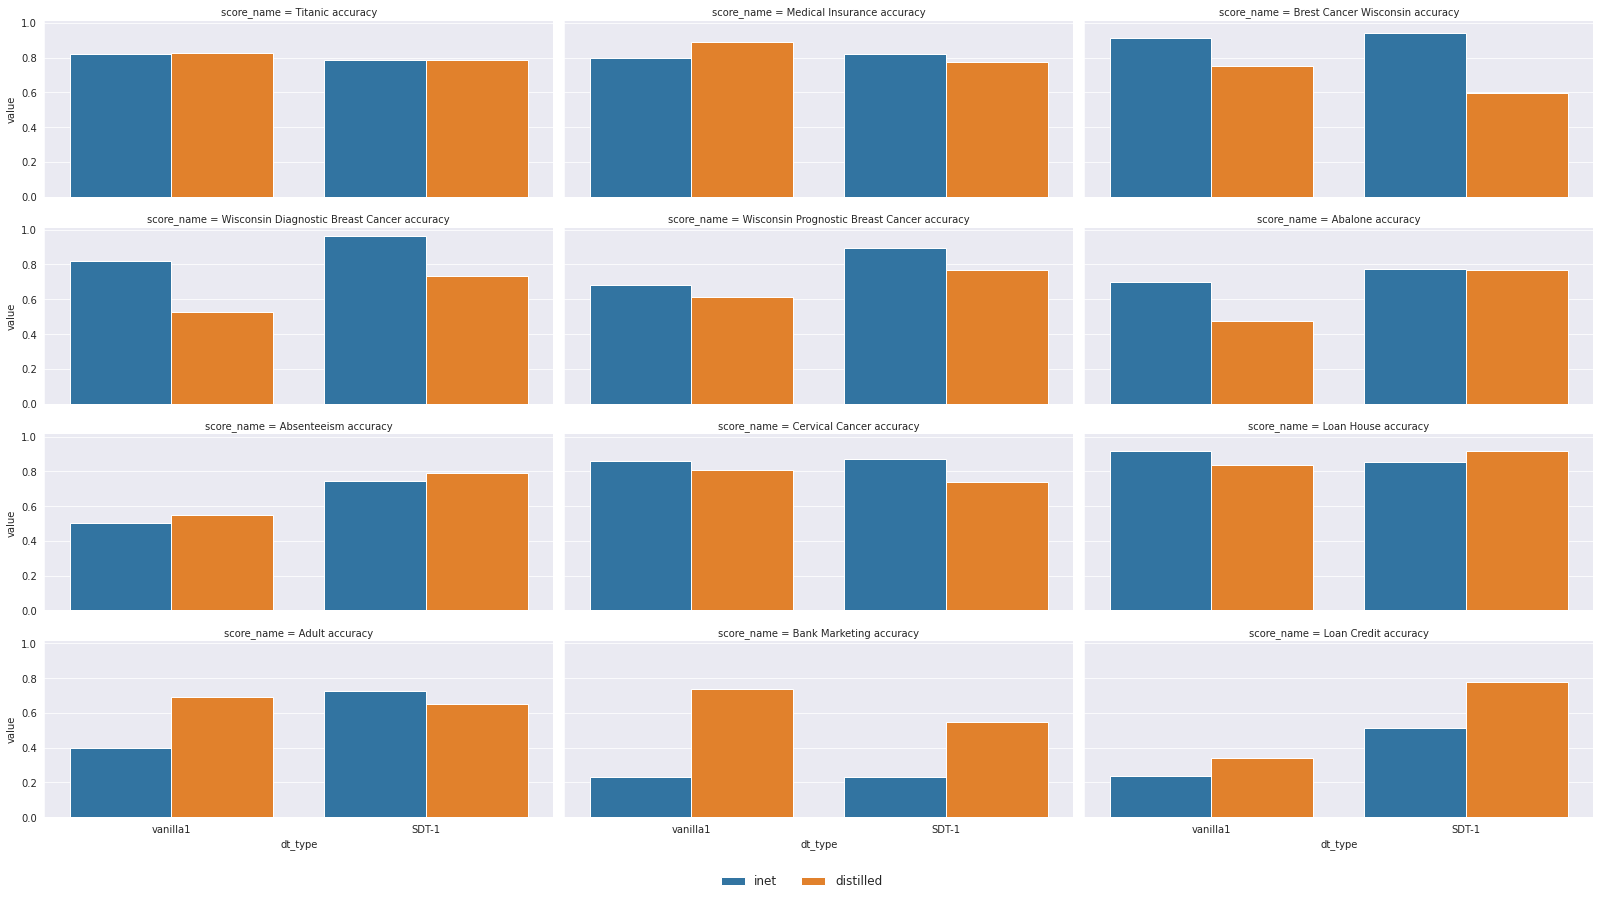

In [17]:
#real_world_scores_df_adjusted_plotting

real_world_scores_df_adjusted_plotting = real_world_scores_df_adjusted.melt(id_vars=["dt_type", "technique"], 
                                                                            var_name="score_name", 
                                                                            value_name="value")

real_world_scores_df_adjusted_plotting = real_world_scores_df_adjusted_plotting[real_world_scores_df_adjusted_plotting['value'].notna()]
#real_world_scores_df_adjusted_plotting.head(10)

#plot = plot_results(real_world_scores_df_adjusted_plotting, 'score_name', 'technique', 'value', 'dt_type', plot_type=sns.barplot, aspect=2.5, col_wrap=3)
plot = plot_results(data_reduced = real_world_scores_df_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete.pdf', bbox_inches = 'tight', pad_inches = 0)

In [18]:
distribution_list = ['uniform', 'gamma', 'beta', 'poisson', 'normal']

columns = flatten_list(['dt_type', 'technique', 'distrib', [[real_world_dataset_name + ' ' + score_name for real_world_dataset_name in real_world_datasets.keys()] for score_name in score_names_list]])
empty_data_distilled = np.array([[
             #flatten_list(['vanilla1', 'inet', distrib, [np.nan for _ in range(len(columns)-3)]]),
             flatten_list(['vanilla1', 'distilled', distrib, [np.nan for _ in range(len(columns)-3)]]),
             #flatten_list(['SDT1',  'inet', distrib, [np.nan for _ in range(len(columns)-3)]]),
             #flatten_list(['SDT1',  'distilled', distrib, [np.nan for _ in range(len(columns)-3)]]),
             #flatten_list(['SDT-1',  'inet', distrib, [np.nan for _ in range(len(columns)-3)]]),
             flatten_list(['SDT-1',  'distilled', distrib, [np.nan for _ in range(len(columns)-3)]])] for distrib in distribution_list] )

empty_data_distilled = empty_data_distilled.reshape(empty_data_distilled.shape[0]*empty_data_distilled.shape[1], -1)

empty_data_inet = np.array([
                    flatten_list(['vanilla1', 'inet', 'inet', [np.nan for _ in range(len(columns)-3)]]),
                    #flatten_list(['SDT1', 'inet', 'inet', [np.nan for _ in range(len(columns)-3)]]),
                    flatten_list(['SDT-1', 'inet', 'inet', [np.nan for _ in range(len(columns)-3)]]),
                  ])

empty_data = np.vstack([empty_data_inet, empty_data_distilled])
empty_data[:,3:] = np.nan_to_num(x=empty_data[:,3:].astype(np.float64), nan=0)

real_world_scores_df_distrib_adjusted = pd.DataFrame(data=empty_data, columns=columns)


for real_world_dataset_name, real_world_dataset_variables in real_world_datasets.items():
    #scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]

    if real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables].shape[0] > 1:
        scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]
        for i, row in real_world_scores_df_distrib_adjusted.iterrows():
            for score_name in score_names_list:
                relevant_column = None
                for column_name in real_world_scores_df.columns:
                    if (row['distrib'] in column_name and 
                        real_world_dataset_name in column_name and 
                        score_name in column_name and 
                        '10000' in column_name and 
                        '100000' not in column_name and 
                        'std' not in column_name):
                        if relevant_column is None:
                            relevant_column = column_name
                        else:
                            relevant_column = column_name
                            print('DOUBLE')
                try:
                    if row['technique'] == 'distilled':
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]

                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)
                    else:
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]
                        relevant_column = score_name + '_' + real_world_dataset_name + '_10000'
                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)
                except:
                    pass
                    #print(scores_by_variables_selected[relevant_column])
                    #traceback.print_exc()

real_world_scores_df_distrib_adjusted.iloc[:,3:] = real_world_scores_df_distrib_adjusted.iloc[:,3:].astype(float)
real_world_scores_df_distrib_adjusted.head(100)           

dt_type  technique  distrib Titanic accuracy Medical Insurance accuracy  \
0   vanilla1       inet     inet         0.820225                   0.796992   
1      SDT-1       inet     inet         0.786517                   0.819549   
2   vanilla1  distilled  uniform         0.797753                   0.977444   
3      SDT-1  distilled  uniform         0.786517                   0.834586   
4   vanilla1  distilled    gamma         0.786517                   0.789474   
5      SDT-1  distilled    gamma         0.797753                   0.924812   
6   vanilla1  distilled     beta          0.88764                   0.969925   
7      SDT-1  distilled     beta         0.775281                    0.87218   
8   vanilla1  distilled  poisson         0.808989                    0.93985   
9      SDT-1  distilled  poisson         0.797753                    0.81203   
10  vanilla1  distilled   normal         0.865169                   0.774436   
11     SDT-1  distilled   normal         0.786517                   0.421053   

   Brest Cancer Wisconsin accuracy  \
0                         0.913043   
1                         0.942029   
2                         0.782609   
3                         0.985507   
4                         0.898551   
5                         0.681159   
6                         0.855072   
7                         0.318841   
8                         0.898551   
9                         0.681159   
10                        0.318841   
11                        0.318841   

   Wisconsin Diagnostic Breast Cancer accuracy  \
0                                     0.821429   
1                                     0.964286   
2                                     0.285714   
3                                          1.0   
4                                     0.714286   
5                                     0.714286   
6                                     0.428571   
7                                     0.946429   
8                                     0.785714   
9                                     0.714286   
10                                    0.428571   
11                                    0.285714   

   Wisconsin Prognostic Breast Cancer accuracy Abalone accuracy  \
0                                     0.684211         0.697842   
1                                     0.894737         0.772182   
2                                     0.684211         0.335731   
3                                          1.0         0.920863   
4                                     0.631579         0.757794   
5                                     0.473684         0.695444   
6                                     0.684211         0.330935   
7                                          1.0         0.870504   
8                                     0.368421         0.628297   
9                                     0.421053         0.736211   
10                                    0.684211         0.330935   
11                                    0.947368         0.609113   

   Absenteeism accuracy Cervical Cancer accuracy Loan House accuracy  \
0                   0.5                 0.858824            0.918033   
1              0.743243                 0.870588            0.852459   
2                   0.5                 0.847059            0.918033   
3              0.851351                 0.835294            0.918033   
4              0.608108                 0.647059            0.622951   
5              0.783784                 0.858824            0.918033   
6                   0.5                 0.847059            0.901639   
7              0.878378                 0.270588            0.918033   
8              0.648649                 0.870588            0.819672   
9              0.594595                 0.858824            0.918033   
10                  0.5                 0.811765            0.918033   
11             0.851351                 0.858824            0.918033   

   Adult 

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


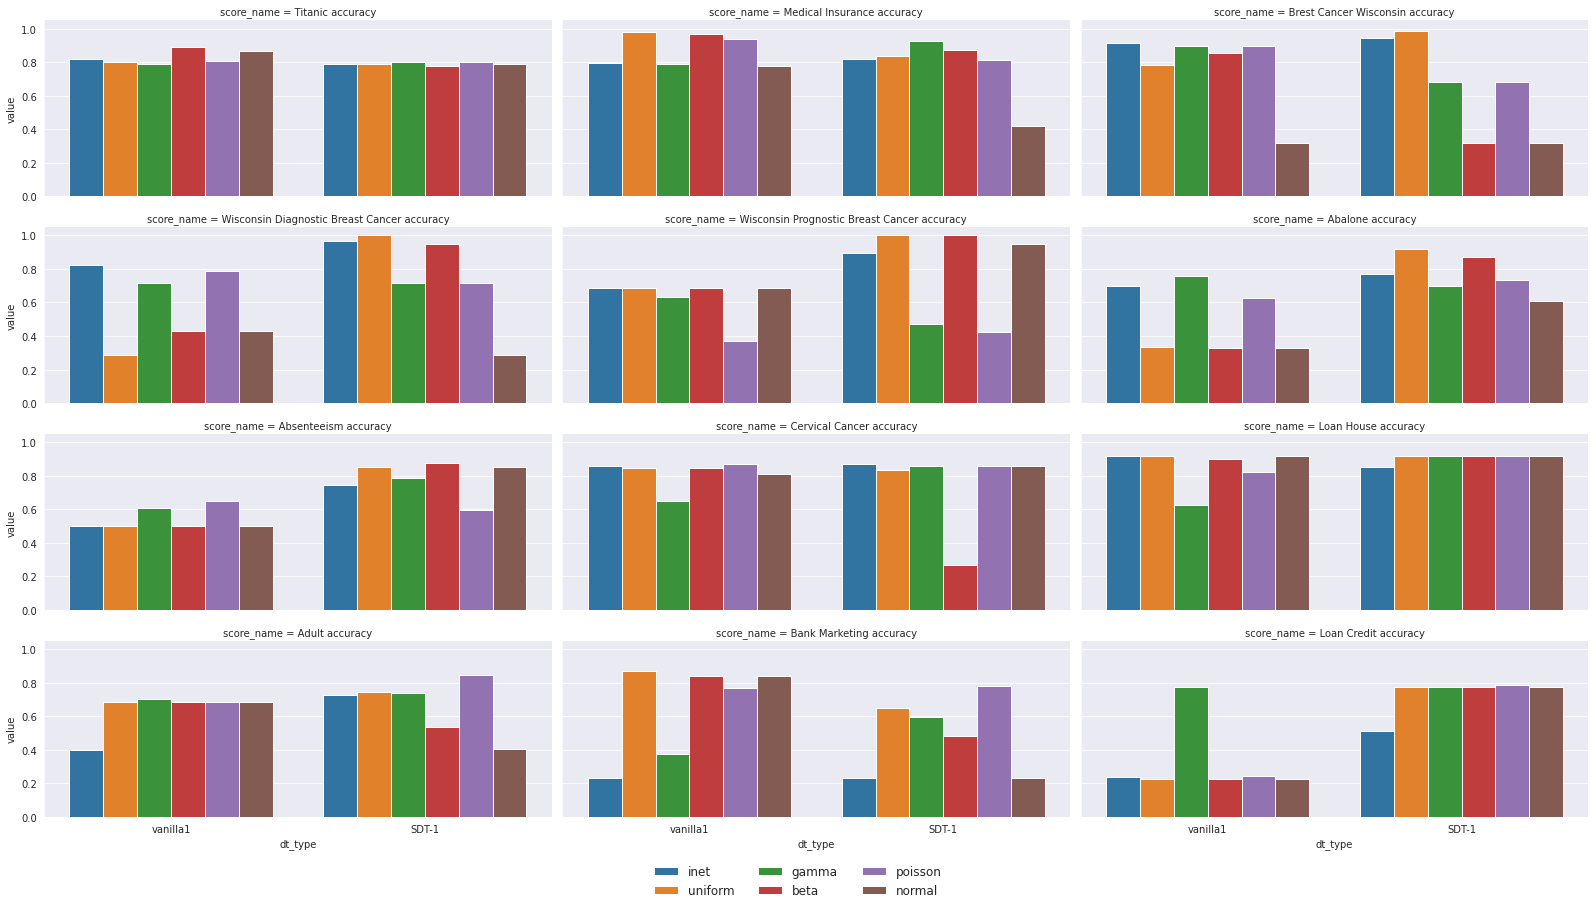

In [19]:

real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted.melt(id_vars=["dt_type", "technique", "distrib"], 
                                                                            var_name="score_name", 
                                                                            value_name="value")

real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted_plotting[real_world_scores_df_distrib_adjusted_plotting['value'].notna()]
real_world_scores_df_distrib_adjusted_plotting['distrib'] = pd.Categorical(real_world_scores_df_distrib_adjusted_plotting['distrib'], flatten_list(['inet', distribution_list]))
real_world_scores_df_distrib_adjusted_plotting.sort_values('distrib')

#real_world_scores_df_distrib_adjusted_plotting.head(10)


plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'distrib', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_distrib.pdf', bbox_inches = 'tight', pad_inches = 0)


In [ ]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_distrib.pdf', bbox_inches = 'tight', pad_inches = 0)


In [ ]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.boxplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_distrib.pdf', bbox_inches = 'tight', pad_inches = 0)
